In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

In [39]:
train = r"C:\Users\CH\Desktop\practice codes\Project_Dataset\train"
valid = r"C:\Users\CH\Desktop\practice codes\Project_Dataset\valid"
test = r"C:\Users\CH\Desktop\practice codes\Project_Dataset\test"

In [40]:
def count_files(directory):
    subfolders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    counts = {}
    for subfolder in subfolders:
        subfolder_path = os.path.join(directory, subfolder)
        count = sum([len(files) for _, _, files in os.walk(subfolder_path)])
        counts[subfolder] = count
    return counts

In [41]:
print(count_files(test))

{'adenocarcinoma': 120, 'large_cell': 51, 'normal': 54, 'squamous': 90}


In [42]:
print(count_files(train))

{'adenocarcinoma': 195, 'large_cell': 115, 'normal': 148, 'squamous': 155}


In [43]:
print(count_files(valid))

{'adenocarcinoma': 23, 'large_cell': 21, 'normal': 13, 'squamous': 15}


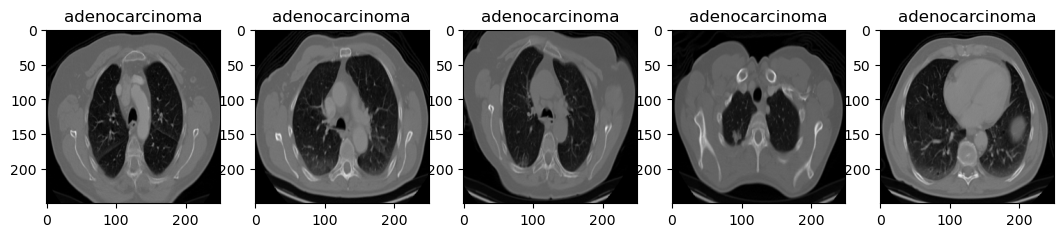

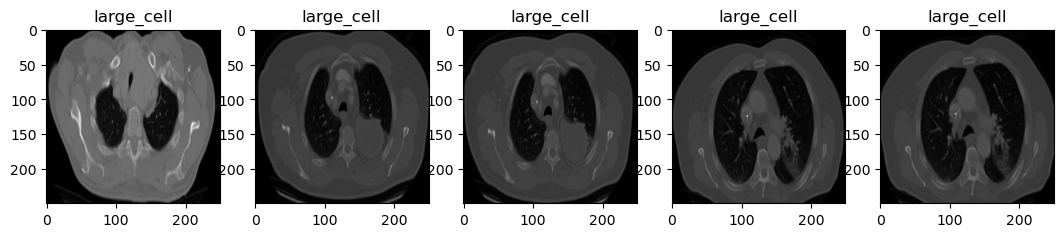

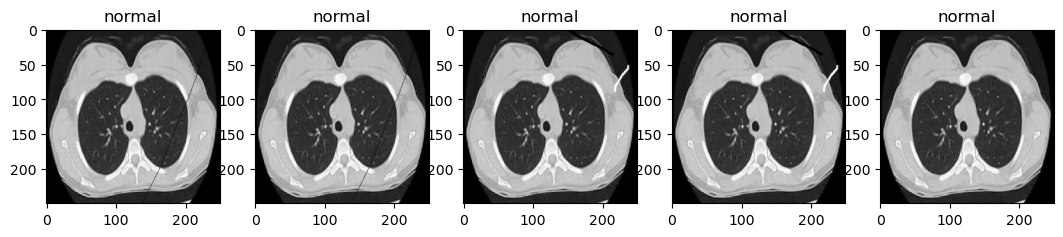

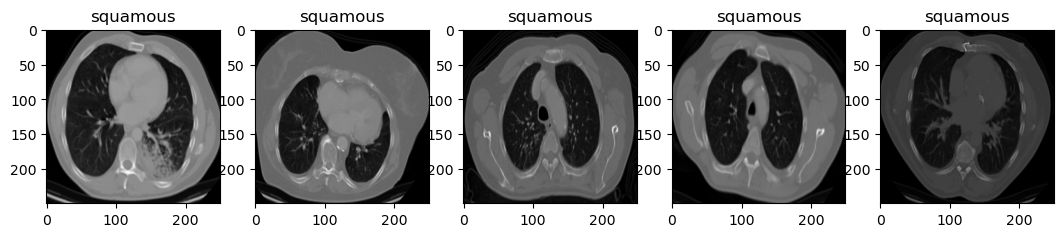

In [44]:
def plot_images(folder_path, subfolder_name):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 5, figsize=(13, 13))  
    
    for i, image_file in enumerate(image_files[:5]):
        image_path = os.path.join(subfolder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (250, 250))  
        axes[i].imshow(image)
        axes[i].set_title(subfolder_name)
    
    plt.show()

train_list = ['adenocarcinoma',"large_cell",'normal','squamous']
for category in train_list:
    plot_images(train,category)

In [45]:
def apply_clahe(folder_path, subfolder_name):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    folder = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\train_enhance'
    output_folder_path = os.path.join(folder, subfolder_name)

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Applied CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_output = clahe.apply(gray)
        # Save the CLAHE enhanced image to the output folder
        output_image_path = os.path.join(output_folder_path, image_file)
        cv2.imwrite(output_image_path, clahe_output)

train_list = ['adenocarcinoma',"large_cell",'normal','squamous']
for category in train_list:
    enhanced_images = apply_clahe(train, category)

In [46]:
def apply_clahe(folder_path, subfolder_name):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    folder = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\valid_enhance'
    output_folder_path = os.path.join(folder, subfolder_name)

    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_output = clahe.apply(gray)
        output_image_path = os.path.join(output_folder_path, image_file)
        cv2.imwrite(output_image_path, clahe_output)

train_list = ['adenocarcinoma',"large_cell",'normal','squamous']
for category in train_list:
    enhanced_images = apply_clahe(valid, category)

In [47]:
def apply_clahe(folder_path, subfolder_name):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    folder = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\test_enhance'
    output_folder_path = os.path.join(folder, subfolder_name)

    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_output = clahe.apply(gray)
        output_image_path = os.path.join(output_folder_path, image_file)
        cv2.imwrite(output_image_path, clahe_output)

train_list = ['adenocarcinoma',"large_cell",'normal','squamous']
for category in train_list:
    enhanced_images = apply_clahe(test, category)

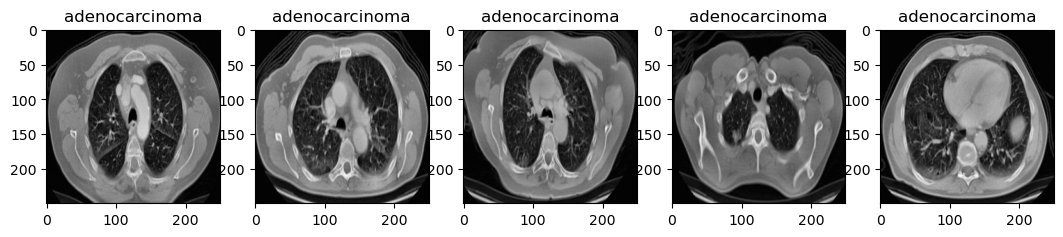

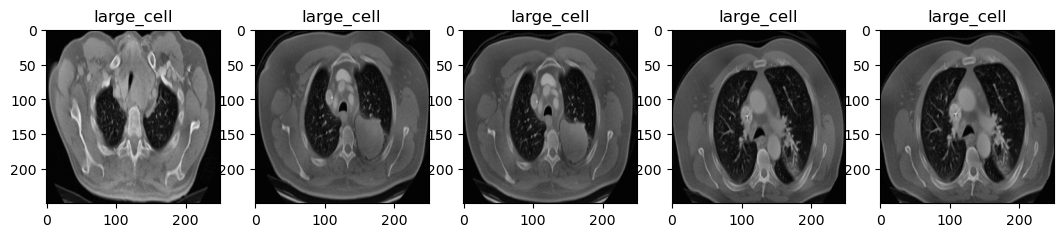

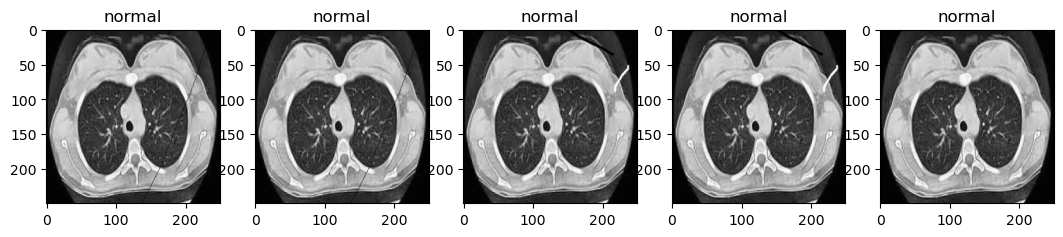

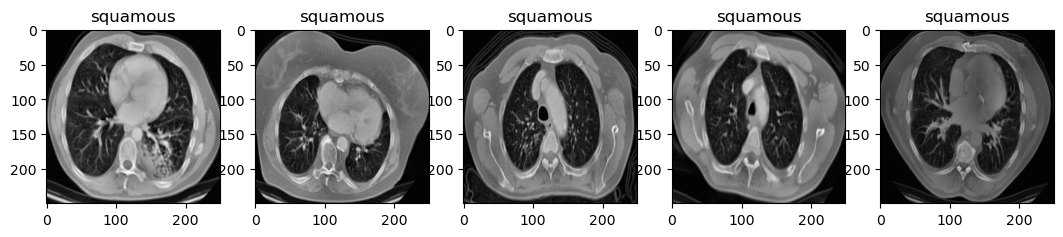

In [48]:
train_enhanced = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\train_enhance'
for category in train_list:
    plot_images(train_enhanced,category)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,        
    zoom_range=0.1,         
    horizontal_flip=True,   
)

valid_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,        
    zoom_range=0.1,         
    horizontal_flip=True,   
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,        
    zoom_range=0.1,         
    horizontal_flip=True,  
)

In [50]:
train_folder = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\train_enhance'
train_gen = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size = 32,
    class_mode='categorical'
)

Found 613 images belonging to 4 classes.


In [51]:
valid_folder = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\valid_enhance'
valid_gen = valid_datagen.flow_from_directory(
    valid_folder,
    target_size=(224, 224),
    batch_size = 32,
    class_mode='categorical'
)

Found 72 images belonging to 4 classes.


In [52]:
test_folder = r'C:\Users\CH\Desktop\practice codes\Project_enhanced\test_enhance'
test_gen = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 315 images belonging to 4 classes.


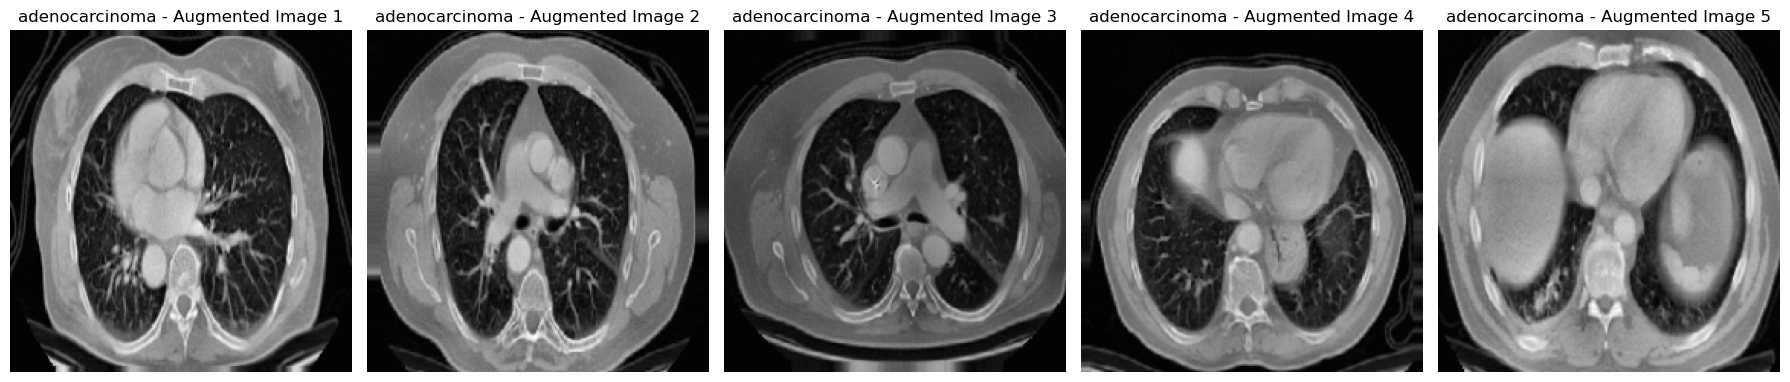

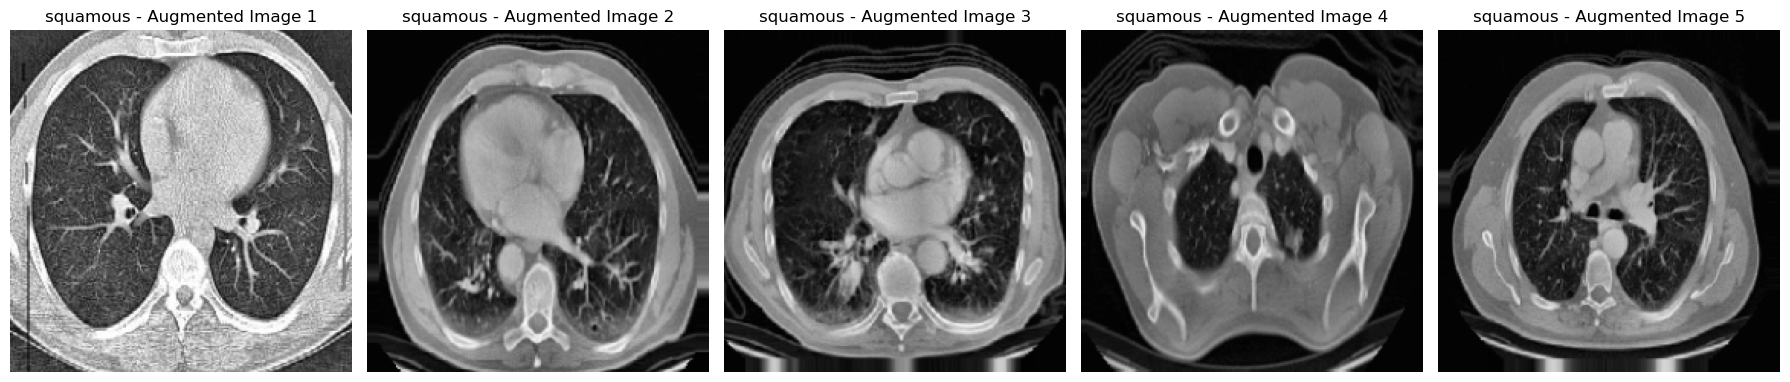

In [53]:
for category in train_list:
    plt.figure(figsize=(18, 6))
    for i in range(5):
        augmented_image, _ = next(train_gen)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(augmented_image[0])
        plt.title(f'{category} - Augmented Image {i + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [54]:
input_shape = (224 , 224 , 3)
n_classes = 4

In [55]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate,BatchNormalization,Flatten,Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
import keras

## CNN MODEL

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), padding = 'same' ,activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding ='same' ,activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), padding = 'same' ,activation='relu'),
        Conv2D(128, (3, 3), padding = 'same' ,activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3) 
cnn_model = create_cnn_model(input_shape)

In [64]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_115 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_116 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 conv2d_117 (Conv2D)         (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                

In [65]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [66]:
save = cnn_model.fit(train_gen, epochs=25, validation_data=valid_gen)

Epoch 1/25
20/20 [==============================] - 56s 3s/step - loss: 0.2075 - accuracy: 0.2675 - val_loss: 0.1872 - val_accuracy: 0.3194
Epoch 2/25
20/20 [==============================] - 55s 3s/step - loss: 0.1810 - accuracy: 0.2822 - val_loss: 0.1750 - val_accuracy: 0.1944
Epoch 3/25
20/20 [==============================] - 52s 3s/step - loss: 0.1607 - accuracy: 0.4454 - val_loss: 0.1516 - val_accuracy: 0.5000
Epoch 4/25
20/20 [==============================] - 52s 3s/step - loss: 0.1459 - accuracy: 0.5220 - val_loss: 0.1491 - val_accuracy: 0.5000
Epoch 5/25
20/20 [==============================] - 61s 3s/step - loss: 0.1454 - accuracy: 0.5269 - val_loss: 0.1476 - val_accuracy: 0.4444
Epoch 6/25
20/20 [==============================] - 51s 3s/step - loss: 0.1389 - accuracy: 0.5465 - val_loss: 0.1562 - val_accuracy: 0.4028
Epoch 7/25
20/20 [==============================] - 50s 2s/step - loss: 0.1421 - accuracy: 0.5334 - val_loss: 0.1524 - val_accuracy: 0.4167
Epoch 8/25
20/20 [==

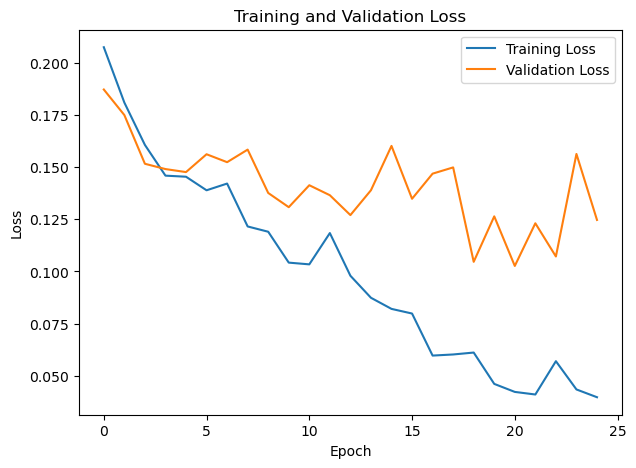

In [111]:
plt.figure(figsize=(7, 5))
plt.plot(save.history['loss'], label='Training Loss')
plt.plot(save.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

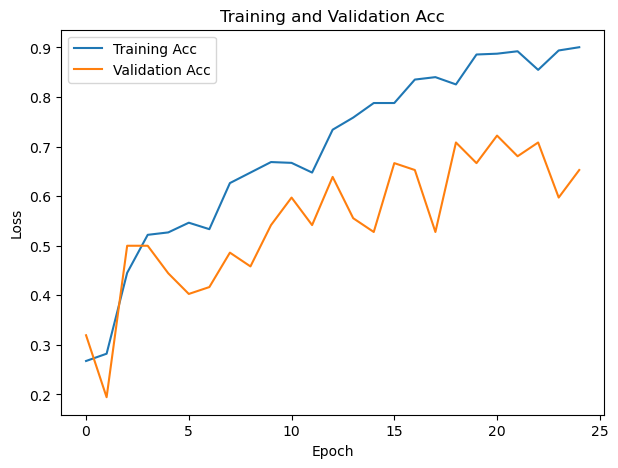

In [112]:
plt.figure(figsize=(7, 5))
plt.plot(save.history['accuracy'], label='Training Acc')
plt.plot(save.history['val_accuracy'], label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## INCEPTION MODEL

In [71]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Input

def Create_model(input_shape, block1=True, block2=True, block3=True,
                 block4=True, regularizer=None, Dropout_ratio=0.25):

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freezed base model layers
    base_model.trainable = False

    inputs = Input(shape=input_shape)

    x = base_model(inputs)

    x = Conv2D(64, (3, 3), padding='same', activation='relu', trainable=block1)(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu', trainable=block1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu', trainable=block2)(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu', trainable=block2)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu', trainable=block3)(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu', trainable=block3)(x)

    x = Conv2D(512, (3, 3), padding='same', activation='relu', trainable=block4)(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu', trainable=block4)(x)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(Dropout_ratio)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)  
inception_model = Create_model(input_shape)

In [72]:
inception_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 conv2d_316 (Conv2D)         (None, 5, 5, 64)          1179712   
                                                                 
 conv2d_317 (Conv2D)         (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 2, 2, 64)          0         
 ng2D)                                                           
                                                                 
 batch_normalization_283 (B  (None, 2, 2, 64)          256       
 atchNormalization)                                        

In [73]:
inception_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [74]:
incep = inception_model.fit(train_gen, epochs=25, validation_data=valid_gen)

Epoch 1/25
20/20 [==============================] - 33s 1s/step - loss: 0.1812 - accuracy: 0.3100 - val_loss: 0.1937 - val_accuracy: 0.3889
Epoch 2/25
20/20 [==============================] - 27s 1s/step - loss: 0.1579 - accuracy: 0.4976 - val_loss: 0.2362 - val_accuracy: 0.4167
Epoch 3/25
20/20 [==============================] - 26s 1s/step - loss: 0.1322 - accuracy: 0.5171 - val_loss: 0.2055 - val_accuracy: 0.5000
Epoch 4/25
20/20 [==============================] - 25s 1s/step - loss: 0.1190 - accuracy: 0.5579 - val_loss: 0.1699 - val_accuracy: 0.4861
Epoch 5/25
20/20 [==============================] - 25s 1s/step - loss: 0.1168 - accuracy: 0.5775 - val_loss: 0.1622 - val_accuracy: 0.5000
Epoch 6/25
20/20 [==============================] - 26s 1s/step - loss: 0.1137 - accuracy: 0.5922 - val_loss: 0.2506 - val_accuracy: 0.3750
Epoch 7/25
20/20 [==============================] - 26s 1s/step - loss: 0.1165 - accuracy: 0.5922 - val_loss: 0.1631 - val_accuracy: 0.5000
Epoch 8/25
20/20 [==

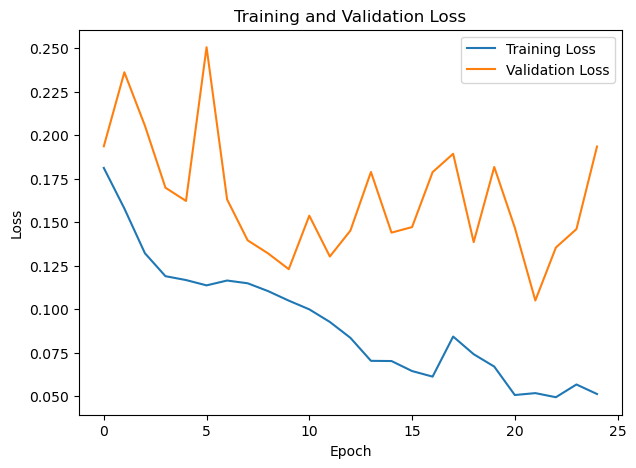

In [113]:
plt.figure(figsize=(7, 5))
plt.plot(incep.history['loss'], label='Training Loss')
plt.plot(incep.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

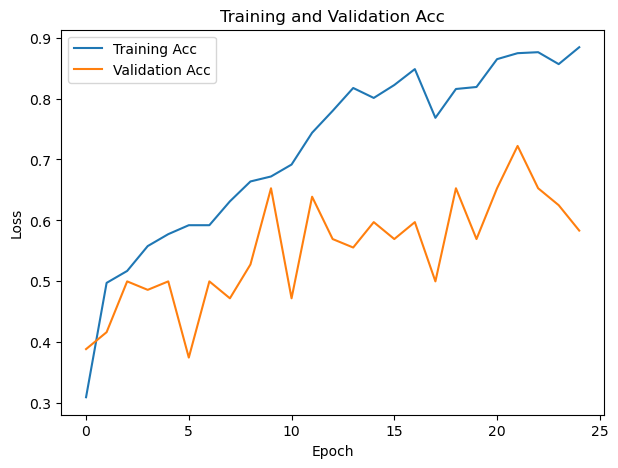

In [114]:
plt.figure(figsize=(7, 5))
plt.plot(incep.history['accuracy'], label='Training Acc')
plt.plot(incep.history['val_accuracy'], label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## MODEL BUILT USING BASE MODELS AS RESNET50 AND MOBILENETV2

In [94]:
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def Create_model(input_shape, block1=True, block2=True, block3=True,
                 Dropout_ratio=0.15):

    base_model_1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freezed base model layers
    base_model_1.trainable = False

    base_model_2 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freezed base model layers
    base_model_2.trainable = False

    inputs = Input(shape=input_shape)

    x1 = base_model_1(inputs)
    x2 = base_model_2(inputs)

    x = keras.layers.Concatenate()([x1, x2])

    x = Conv2D(64, (3, 3), padding='same', activation='relu', trainable=block1 )(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu', trainable=block1 )(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu', trainable=block2 )(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu', trainable=block2 )(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu', trainable=block3 )(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu', trainable=block3 )(x)

    x = Flatten()(x)
    x = Dense(64, activation='relu',)(x)
    x = Dropout(Dropout_ratio)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)  
resnet_model = Create_model(input_shape)

In [95]:
resnet_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)           2257984   ['input_22[0][0]']            
 tional)                                                                                          
                                                                                                  
 resnet50 (Functional)       (None, 7, 7, 2048)           2358771   ['input_22[0][0]']            
                                                          2                                       
                                                                                            

In [96]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.0015  # Example learning rate

# Compile the model with Adam optimizer and the specified learning rate
resnet_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['accuracy'])

In [97]:
resnet = resnet_model.fit(train_gen, epochs=30, validation_data=valid_gen)

Epoch 1/30
20/20 [==============================] - 54s 2s/step - loss: 0.1775 - accuracy: 0.3736 - val_loss: 0.1462 - val_accuracy: 0.4861
Epoch 2/30
20/20 [==============================] - 48s 2s/step - loss: 0.1404 - accuracy: 0.4927 - val_loss: 0.1440 - val_accuracy: 0.4722
Epoch 3/30
20/20 [==============================] - 43s 2s/step - loss: 0.1334 - accuracy: 0.5024 - val_loss: 0.1454 - val_accuracy: 0.4861
Epoch 4/30
20/20 [==============================] - 45s 2s/step - loss: 0.1283 - accuracy: 0.5432 - val_loss: 0.1425 - val_accuracy: 0.4861
Epoch 5/30
20/20 [==============================] - 42s 2s/step - loss: 0.1176 - accuracy: 0.5612 - val_loss: 0.1310 - val_accuracy: 0.4861
Epoch 6/30
20/20 [==============================] - 43s 2s/step - loss: 0.1159 - accuracy: 0.5905 - val_loss: 0.1589 - val_accuracy: 0.4861
Epoch 7/30
20/20 [==============================] - 45s 2s/step - loss: 0.1115 - accuracy: 0.6183 - val_loss: 0.1343 - val_accuracy: 0.5139
Epoch 8/30
20/20 [==

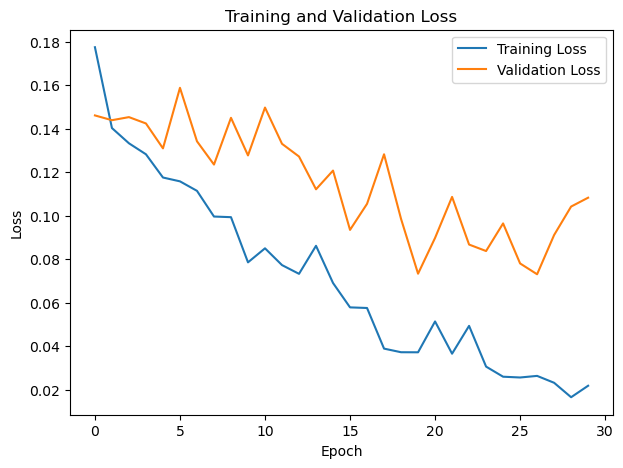

In [115]:
plt.figure(figsize=(7, 5))
plt.plot(resnet.history['loss'], label='Training Loss')
plt.plot(resnet.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

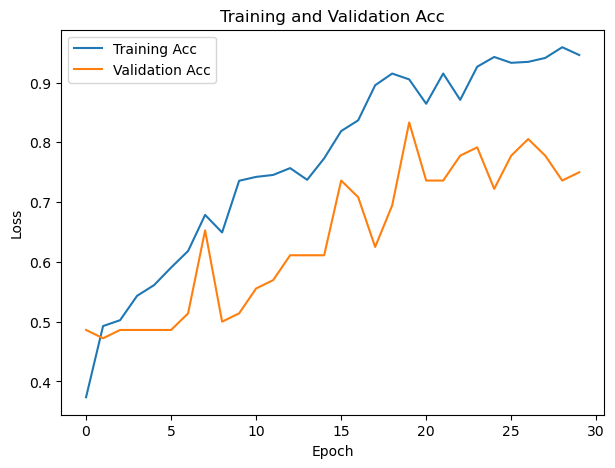

In [116]:
plt.figure(figsize=(7, 5))
plt.plot(resnet.history['accuracy'], label='Training Acc')
plt.plot(resnet.history['val_accuracy'], label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## MODEL BUILT USING BASE  MODELS AS INCEPTIONV3 AND MOBILENETV2

In [37]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

def Create_model(input_shape, block1=True, block2=True, block3=True,
                 block4=True, block5=True, regularizer=keras.regularizers.l2(0.0001),
                 Dropout_ratio=0.25):

    base_model_1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freezed base model layers
    base_model_1.trainable = False

    base_model_2 = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freezed base model layers
    base_model_2.trainable = False

    inputs = keras.Input(shape=input_shape)

    x1 = base_model_1(inputs)
    x1 = GlobalAveragePooling2D()(x1)  
    x2 = base_model_2(inputs)
    x2 = GlobalAveragePooling2D()(x2)  

    x = keras.layers.Concatenate()([x1, x2])

    x = Dense(64, activation='tanh')(x)
    x = Dropout(Dropout_ratio)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)  
model = Create_model(input_shape)

In [77]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)           2257984   ['input_43[0][0]']            
 tional)                                                                                          
                                                                                                  
 inception_v3 (Functional)   (None, 5, 5, 2048)           2180278   ['input_43[0][0]']            
                                                          4                                       
                                                                                            

In [78]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [79]:
history = model.fit(train_gen, epochs=35, verbose=1, validation_data=valid_gen)

Epoch 1/35
20/20 [==============================] - 36s 1s/step - loss: 0.1902 - accuracy: 0.3915 - val_loss: 0.1753 - val_accuracy: 0.4306
Epoch 2/35
20/20 [==============================] - 27s 1s/step - loss: 0.1539 - accuracy: 0.5465 - val_loss: 0.1810 - val_accuracy: 0.4167
Epoch 3/35
20/20 [==============================] - 28s 1s/step - loss: 0.1525 - accuracy: 0.5628 - val_loss: 0.1763 - val_accuracy: 0.4722
Epoch 4/35
20/20 [==============================] - 28s 1s/step - loss: 0.1403 - accuracy: 0.6036 - val_loss: 0.1759 - val_accuracy: 0.4861
Epoch 5/35
20/20 [==============================] - 28s 1s/step - loss: 0.1294 - accuracy: 0.6639 - val_loss: 0.1728 - val_accuracy: 0.5000
Epoch 6/35
20/20 [==============================] - 28s 1s/step - loss: 0.1274 - accuracy: 0.6607 - val_loss: 0.1755 - val_accuracy: 0.4722
Epoch 7/35
20/20 [==============================] - 28s 1s/step - loss: 0.1253 - accuracy: 0.6868 - val_loss: 0.1655 - val_accuracy: 0.5417
Epoch 8/35
20/20 [==

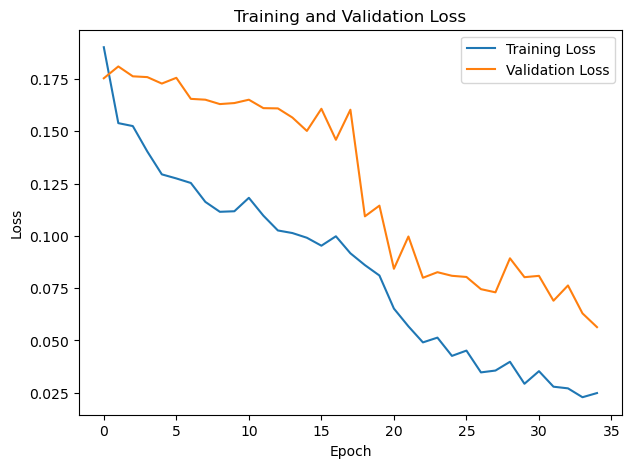

In [81]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

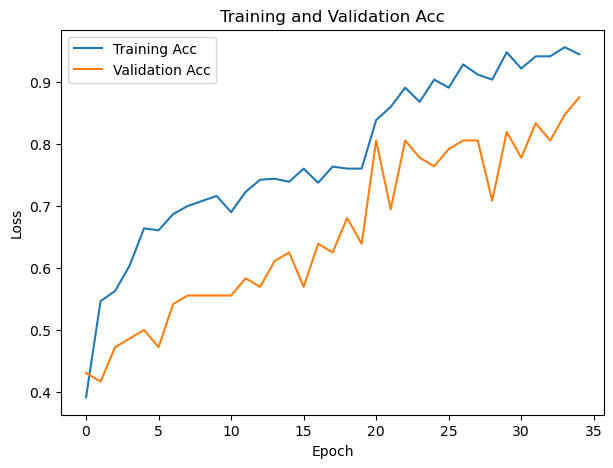

In [82]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 99ms/step


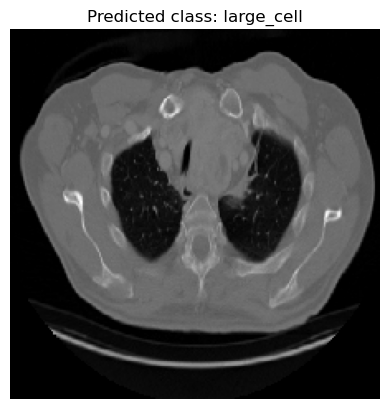

In [110]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the classes
classes = sorted(os.listdir(test))

# Function to predict class for an image
def predict_class(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))  # Assuming input shape of your model is (224, 224, 3)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image
    img_array /= 255.0

    # Make prediction
    predictions = model.predict(img_array)
    
    # Get the predicted class
    predicted_class = classes[np.argmax(predictions)]
    
    return predicted_class, img

# Example usage
image_path = r"C:\Users\CH\Desktop\practice codes\Project_Dataset\test\large_cell\000111 (2).png"  # Replace this with the path to your image
predicted_class, image = predict_class(image_path)

# Plot the image with the predicted class
plt.imshow(image)
plt.title("Predicted class: " + predicted_class)
plt.axis('off')
plt.show()